In [194]:
import numpy as np
import matplotlib.pyplot as plt



1.1 & 1.2 if the image cannot be loaded, please see the hw2.png file.

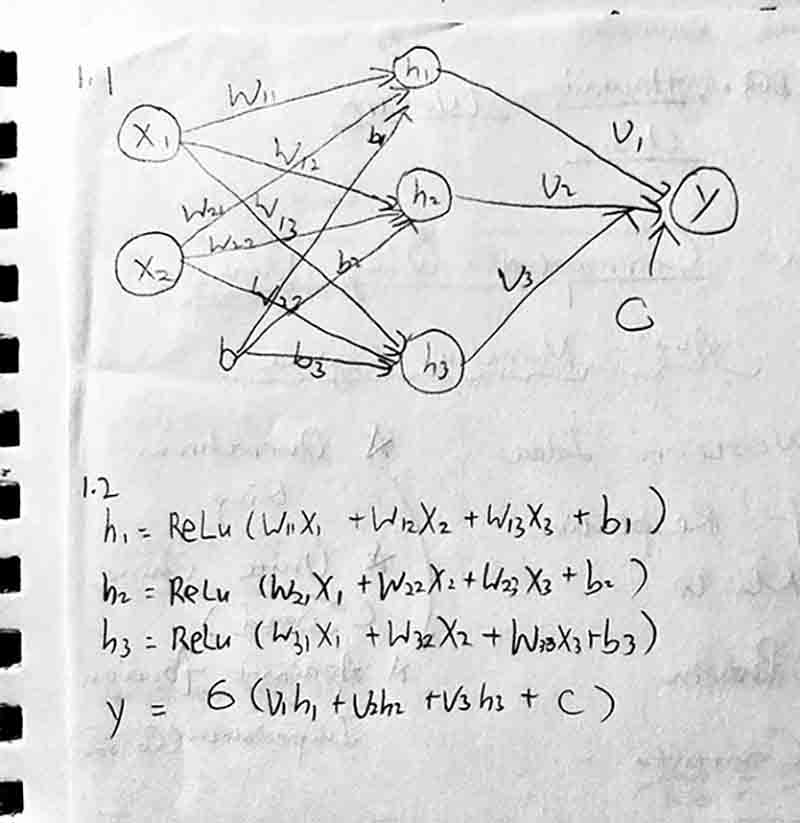

In [256]:
#1.3
def relu(x):
    return np.where(x>0,x,0)
def sigmoid(x):
    return 1/(1+np.exp(-x))

def ff_nn_ReLu(w,x,b,v,c):
    a= np.dot(x,w) + b
    b= relu(a)
    print(c)
    a1 = np.dot(b, v) + c 
    y_hat = sigmoid(a1)
    return y_hat

In [257]:
#1.4 
x = np.array([[1,-1],[0,-1],[0,1]])
w = np.array([[1,-1,0],[0,0,.5]])
v = np.array([[1],[0],[-1]])
b = np.array([[0],[0],[1]]).T
c = np.array([1])
ff_nn_ReLu(w,x,b,v,c)


[1]


array([[0.81757448],
       [0.62245933],
       [0.37754067]])

2.1
$$
\begin{align}
\frac{\partial f}{\partial x}= -3x^2+200x-200y^2
\frac{\partial f}{\partial y}= 400y^3-400xy
\end{align}
$$




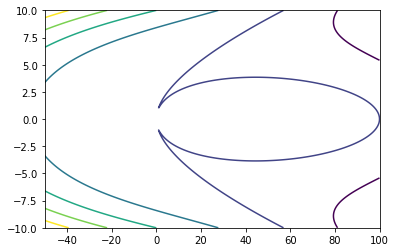

In [258]:
#2.2
x = np.linspace(-50, 100, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
Z = (1-X**3) + 100*(Y**2-X)**2
plt.subplot()
plt.contour(X, Y, Z)


In [259]:
#2.3
def grad_f1(vector):
    x, y = vector
    df_dx = -3*x**2-200*(y**2-x)
    df_dy = 400*y**3-400*x*y
    return np.array([df_dx, df_dy])
    
def minimize(iters=10,learning_rate=10):
    point = np.array([-8,3])
    trajectory = [point]
    for i in range(iters):
        grad = grad_f1(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

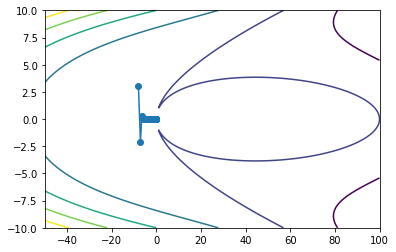

In [260]:
np.random.seed(4)
start = np.array([3,3])
traj = minimize(iters=1000, learning_rate=.00025)
fig, ax = plt.subplots()
CS=ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')



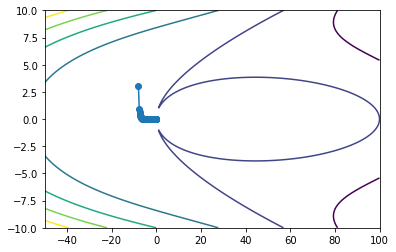

In [261]:

np.random.seed(4)
traj = minimize(iters=1000, learning_rate=.0001)
fig, ax = plt.subplots()
CS=ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


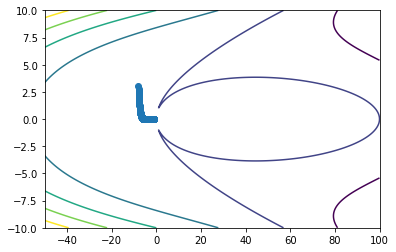

In [262]:
np.random.seed(4)
traj = minimize(iters=1000, learning_rate=.00001)
fig, ax = plt.subplots()
CS=ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


In [263]:
#2.4
def GD_with_momentum(iters=10, alpha=.9, epsilon=10):
    point = np.array([-8,3])
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iters):
        grad = grad_f1(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)
    

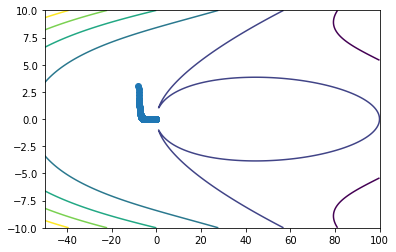

In [264]:
np.random.seed(4)
traj = GD_with_momentum(iters=1000, alpha=.5, epsilon=0.00001)
fig, ax = plt.subplots()
CS=ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

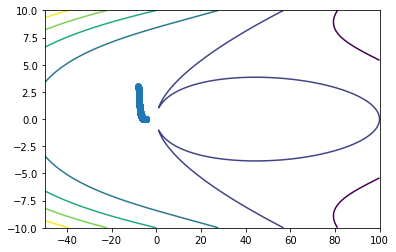

In [265]:
traj = GD_with_momentum(iters=1000, alpha=.01, epsilon=0.0000025)
fig, ax = plt.subplots()
CS=ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

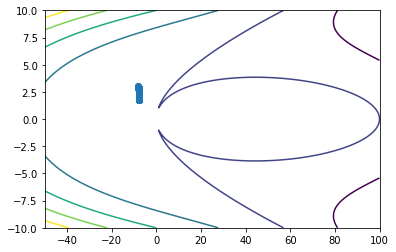

In [266]:
traj = GD_with_momentum(iters=1000, alpha=.001, epsilon=0.0000001)
fig, ax = plt.subplots()
CS=ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

3.1
$$
\begin{align}
L = -y_ilog(\hat{y_i})-(1-y_i)log(1-\hat{y_i})\\
\frac{\partial L}{\partial \hat{y}}= -(\frac{y_i}{\hat{y_i}}-\frac{1-y_i}{1-\hat{y_i}})\\
\frac{\partial L}{\partial \hat{C}}= \frac{\partial L}{\partial \hat{y}}\sigma(C+\vec{h} \cdot \vec{v})(1-\sigma(C+\vec{h} \cdot \vec{v}))\\
\frac{\partial L}{\partial v_1} = \frac{\partial L}{\partial \hat{y}}h_1\\
\frac{\partial L}{\partial v_2} = \frac{\partial L}{\partial \hat{y}}h_2\\
\frac{\partial L}{\partial v_3} = \frac{\partial L}{\partial \hat{y}}h_3\\
\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial out_1}\frac{\partial out_1}{\partial in_1}\frac{\partial in_1}{\partial b_1}\\
\frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial out_2}\frac{\partial out_2}{\partial in_2}\frac{\partial in_2}{\partial b_2}\\
\frac{\partial L}{\partial b_3} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial out_3}\frac{\partial out_3}{\partial in_3}\frac{\partial in_3}{\partial b_3}\\
\frac{\partial L}{\partial w_{11}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial out_1}\frac{\partial out_1}{\partial in_1}\frac{\partial in_1}{\partial w_{11}}\\
\frac{\partial L}{\partial w_{21}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial out_1}\frac{\partial out_1}{\partial in_1}\frac{\partial in_1}{\partial w_{21}}\\
\frac{\partial L}{\partial w_{12}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial out_2}\frac{\partial out_2}{\partial in_2}\frac{\partial in_2}{\partial w_{12}}\\
\frac{\partial L}{\partial w_{22}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial out_2}\frac{\partial out_2}{\partial in_2}\frac{\partial in_2}{\partial w_{22}}\\
\frac{\partial L}{\partial w_{13}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial out_3}\frac{\partial out_3}{\partial in_3}\frac{\partial in_3}{\partial w_{13}}\\
\frac{\partial L}{\partial w_{23}} = \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial out_3}\frac{\partial out_3}{\partial in_3}\frac{\partial in_3}{\partial w_{23}}\\
\end{align}
$$



In [267]:
#3.2
def loss(y, yhat):
    return -(y * np.log(yhat) + (1 - y) * np.log(1 - yhat)).sum()
def grad_loss(y,yhat):
    return -(y/yhat - (1-y)/(1-yhat))
def drelu(x):
    return np.where(x>0, 1, 0)
def grad_f(x,w,b,v,c,y):
    yhat1 = ff_nn_ReLu(w,x,b,v,c)
    Loss = loss(y,yhat1)
    dLoss = grad_loss(y,yhat1)
    inh = np.dot(x,w)+b
    h = relu(inh)
    dc = dLoss*sigmoid(np.dot(h,v)+c)*(1-sigmoid(np.dot(h,v)+c))
    dv = np.dot(dc.T,h).T
    db = np.where(inh>0,1,0)*np.dot(dLoss,v.T)
    dw = np.dot(x.T, db)
    return Loss, np.average(dc, axis=0), dv, np.average(db, axis=0), dw
    
    


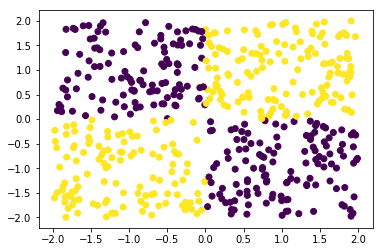

In [268]:
#3.3
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

[[0.62078652]]
[[0.62078652]]
[[0.62075233]]
[[0.62071837]]
[[0.62068467]]
[[0.62065126]]
[[0.62061817]]
[[0.62058541]]
[[0.62055299]]
[[0.62052093]]
[[0.62048924]]
[[0.62045793]]
[[0.62042699]]
[[0.62039643]]
[[0.62036626]]
[[0.62033647]]
[[0.62030707]]
[[0.62027806]]
[[0.62024943]]
[[0.62022119]]
[[0.62019333]]
[[0.62016585]]
[[0.62013874]]
[[0.62011201]]
[[0.62008566]]
[[0.62005967]]
[[0.62003404]]
[[0.62000877]]
[[0.61998386]]
[[0.6199593]]
[[0.61993508]]
[[0.6199112]]
[[0.61988766]]
[[0.61986445]]
[[0.61984156]]
[[0.61981899]]
[[0.61979674]]
[[0.61977479]]
[[0.61975315]]
[[0.61973181]]
[[0.61971076]]
[[0.61969]]
[[0.61966951]]
[[0.61964931]]
[[0.61962937]]
[[0.61960971]]
[[0.6195903]]
[[0.61957114]]
[[0.61955224]]
[[0.61953358]]
[[0.61951516]]
[[0.61949698]]
[[0.61947903]]
[[0.6194613]]
[[0.61944379]]
[[0.6194265]]
[[0.61940943]]
[[0.61939256]]
[[0.61937589]]
[[0.61935942]]
[[0.61934315]]
[[0.61932706]]
[[0.61931117]]
[[0.61929545]]
[[0.61927992]]
[[0.61926456]]
[[0.61924938]]
[[0

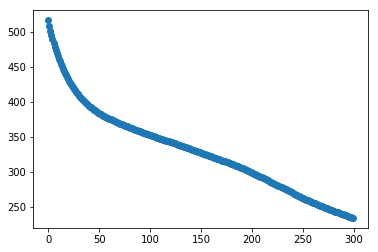

In [274]:
#3.4

w = np.random.uniform(size=6).reshape(2,3)
b = np.random.uniform(size=3).reshape(1,3)
v = np.random.uniform(size=3).reshape(3,1)
c = np.random.uniform(size=1).reshape(1,1)
    
def gradient_descent(x,y,w,b,v,c,iters,learning_rate):
    yhat = ff_nn_ReLu(w,x,b,v,c)
    losses = []
    params = np.array([w,b,v,c])
    for i in range(iters):
        L, dc, dv, db, dw = grad_f(x,w,b,v,c,y)
        losses.append(L)
        grads = np.array([dw,db,dv,dc])
        params = params - grads*learning_rate
        w,b,v,c = params
    return losses
iters = 300
learning_rate = 0.0001
Y = np.where(y,1,0).reshape(500,1)
ls = gradient_descent(x,Y,w,b,v,c,iters, learning_rate)
plt.plot(ls,'-o')                    

3.5 the momentum method seems to converge more efficiently. 

[[0.62078652]]
[[0.62078652]]
[[0.62075233]]
[[0.62069102]]
[[0.62060851]]
[[0.6205099]]
[[0.62039961]]
[[0.62028148]]
[[0.62015883]]
[[0.62003446]]
[[0.61991067]]
[[0.61978932]]
[[0.61967184]]
[[0.61955926]]
[[0.61945232]]
[[0.61935144]]
[[0.61925683]]
[[0.61916847]]
[[0.61908622]]
[[0.61900983]]
[[0.61893894]]
[[0.61887316]]
[[0.61881207]]
[[0.61875525]]
[[0.61870229]]
[[0.61865278]]
[[0.61860636]]
[[0.6185627]]
[[0.61852149]]
[[0.61848249]]
[[0.61844544]]
[[0.61841017]]
[[0.6183765]]
[[0.61834426]]
[[0.61831334]]
[[0.61828361]]
[[0.61825498]]
[[0.61822735]]
[[0.61820065]]
[[0.6181748]]
[[0.61814974]]
[[0.61812542]]
[[0.61810178]]
[[0.61807878]]
[[0.61805638]]
[[0.61803455]]
[[0.61801324]]
[[0.61799243]]
[[0.6179721]]
[[0.61795222]]
[[0.61793278]]
[[0.61791378]]
[[0.61789521]]
[[0.61787707]]
[[0.61785939]]
[[0.61784218]]
[[0.61782546]]
[[0.61780928]]
[[0.61779368]]
[[0.61777871]]
[[0.61776445]]
[[0.61775095]]
[[0.61773828]]
[[0.61772652]]
[[0.61771576]]
[[0.6177061]]
[[0.61769767]]
[

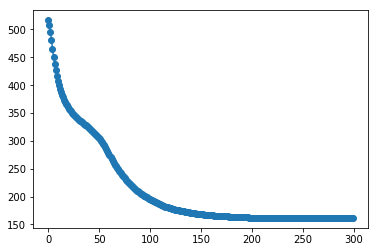

In [275]:
#3.5
def gradient_descent_momentum(x,y,w,b,v,c,iters,learning_rate,alpha):
    yhat = ff_nn_ReLu(w,x,b,v,c)
    losses = []
    params = np.array([w,b,v,c])
    V = np.array([np.zeros(w.shape), np.zeros(b.shape), np.zeros(v.shape), np.zeros(c.shape)])
    for i in range(iters):
        L, dc, dv, db, dw = grad_f(x,w,b,v,c,y)
        losses.append(L)
        grads = np.array([dw,db,dv,dc])
        V = alpha*V + learning_rate*grads
        params = params - V
        w,b,v,c = params
    return losses,params
iters = 300
learning_rate = 0.0001
alpha = 0.8
Y = np.where(y,1,0).reshape(500,1)
ls,params = gradient_descent_momentum(x,Y,w,b,v,c,iters, learning_rate,alpha)
plt.plot(ls,'-o')                    

[[0.6284156]]


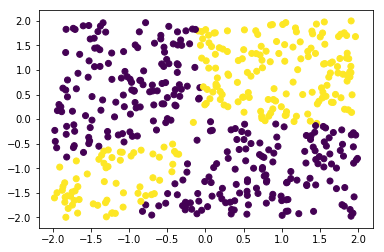

In [276]:
#3.6
w,b,v,c = params
y_pred = ff_nn_ReLu(w, x, b, v, c)
y_pred[y_pred >=0.5] = 1
y_pred[y_pred < 0.5] = 0
plt.scatter(x[:,0],x[:,1],c=y_pred.reshape(500))